Clustering Analysis of Online Courses

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [2]:
df = pd.read_csv('online_courses_uses.csv')

Standardizing the Data

In [3]:
features = df.drop(columns=['Course_ID', 'Course_Name', 'Category', 'Platform'])
X_scaled = StandardScaler().fit_transform(features)

PCA Transformation

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Explained Variance

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

 K-Means Clustering

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

Silhouette Score

In [7]:
silhouette_avg = silhouette_score(X_pca, df['Cluster'])

Plot: K-Means Clustering in PCA Space

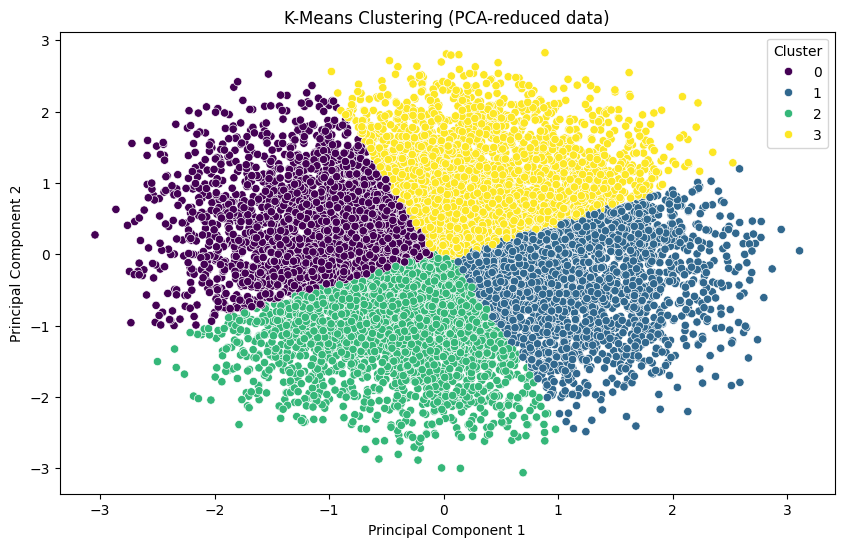

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Plot: Explained Variance Ratio by PCA Components

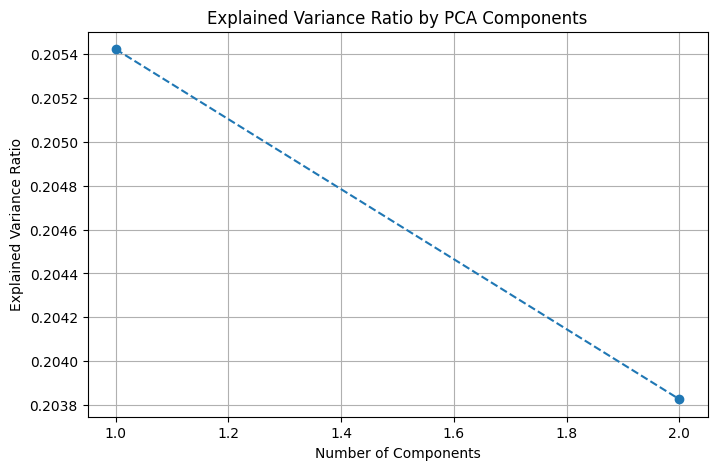

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

Plot: Cumulative Explained Variance Ratio

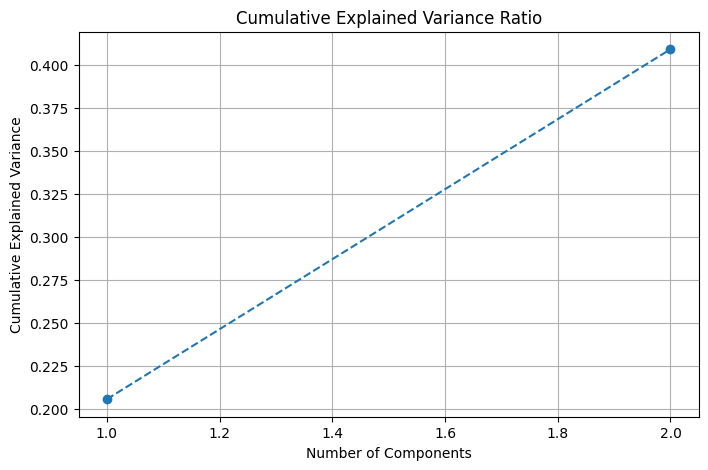

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

K-Means Clustering with Different PCA Components

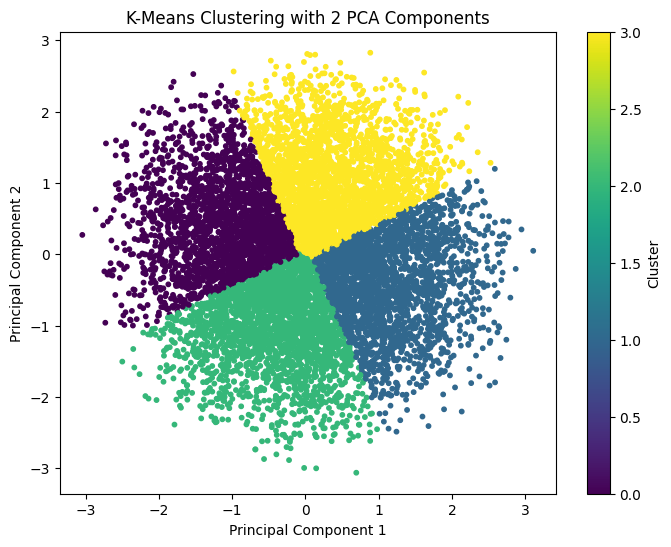

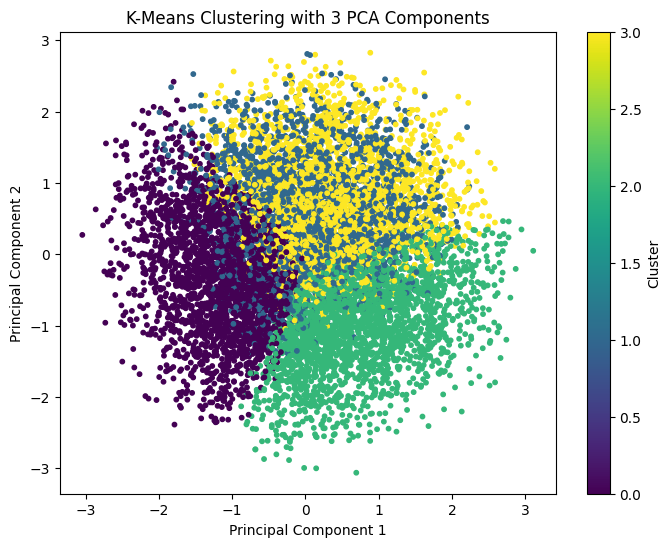

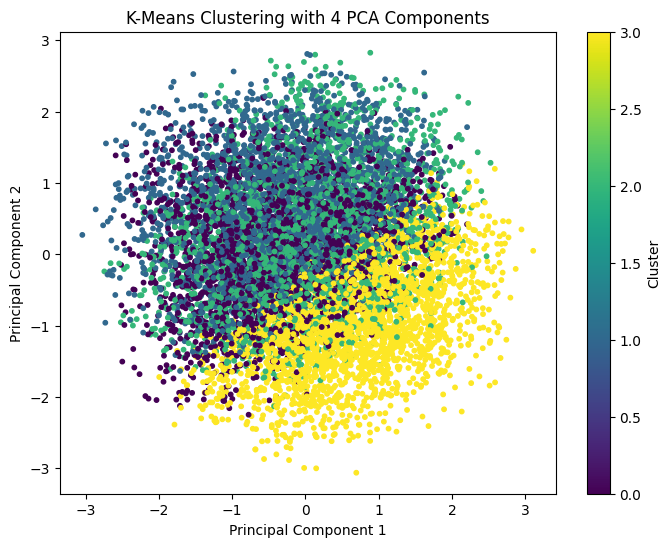

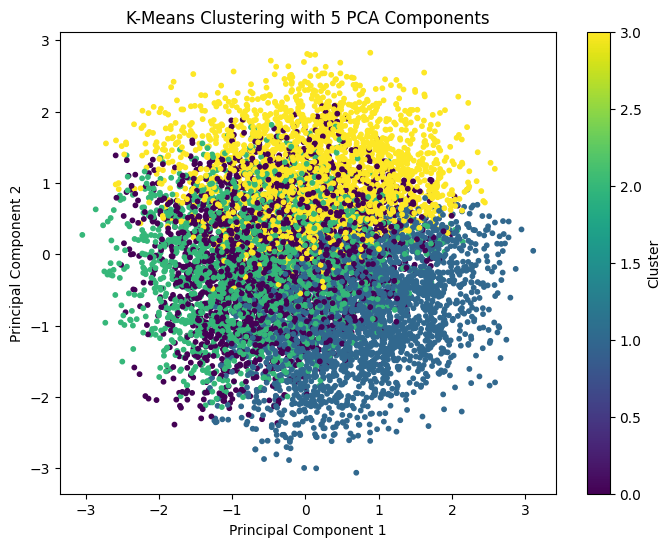

In [11]:
for n_components in range(2, 6):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=4, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.title(f'K-Means Clustering with {n_components} PCA Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


Silhouette Scores for Different PCA Components

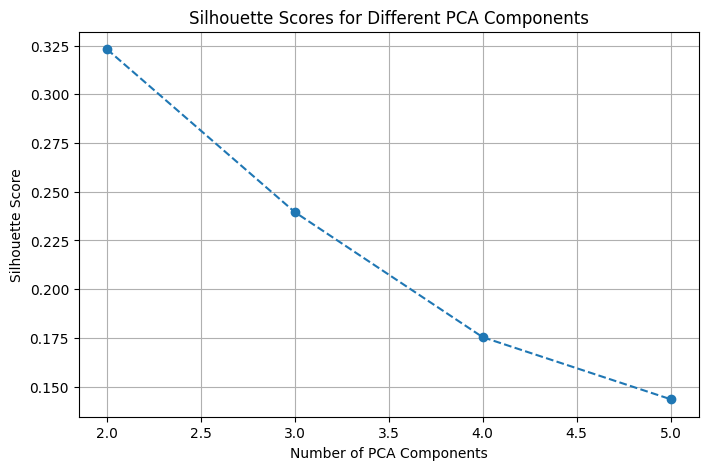

In [12]:
silhouette_scores = []
for n_components in range(2, 6):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=4, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Display Descriptive Statistics for Clusters

In [13]:
for cluster in range(4):
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster].describe())
    print()

Cluster 0
         Course_ID  Duration (hours)  Enrolled_Students  Completion_Rate (%)  \
count  2387.000000       2387.000000        2387.000000          2387.000000   
mean   5072.628823         61.150398        3545.255970            66.059374   
std    2875.764515         24.278292        1113.001299            11.146604   
min       2.000000         10.000000         132.000000            50.009051   
25%    2639.500000         42.000000        2816.500000            56.509534   
50%    5083.000000         63.000000        3782.000000            64.303879   
75%    7593.000000         82.000000        4465.500000            73.768819   
max    9999.000000        100.000000        4999.000000            99.436808   

         Price ($)  Rating (out of 5)  Cluster  
count  2387.000000        2387.000000   2387.0  
mean    128.789441           3.662963      0.0  
std      50.735380           0.471298      0.0  
min      10.189651           3.000149      0.0  
25%      94.042621      

Calculate Success Rates

In [18]:
success_criteria = (df['Completion_Rate (%)'] >= 80) & (df['Rating (out of 5)'] >= 4.0)
df['Success'] = success_criteria
for cluster in range(4):
    cluster_success_rate = df[df['Cluster'] == cluster]['Success'].mean() * 100
    print(f"Cluster {cluster} Success Rate: {cluster_success_rate:.2f}%")

Cluster 0 Success Rate: 2.39%
Cluster 1 Success Rate: 51.75%
Cluster 2 Success Rate: 7.50%
Cluster 3 Success Rate: 19.32%
